### Import all necessary files

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from tweets import *

### Get vectors from table of tweets

In [28]:
# DBSCAN set True, TIDBSCAN set False
test_method = False
# tweets = read_all_tweets(DATA)
tweets, class_vector = read_n_tweets_from_data(DATA, 50) # Provide number of tweets per account 
tweet_vector = np.array(get_vectors(tweets))

### Find out epsilon
Find out epsilon by looking at distribution of max, min, median euclidean distances between all points.

In [29]:
%%time
# distances = create_and_save_distances_list(tweet_vector, save=False) # Compute distances
# # distances = read_distances_list() # Read previously computed distances
# minimum, median, maximum = get_basic_statistics(distances)
# plot_basic_statistics(minimum, median, maximum)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.82 µs


### Group vectors for multiple epsilon
Now after analyzing distribution of distances between points
do clustering n times for epsilon_start and delta_epsilon parameters

In [30]:
%%time
n = 50
epsilon_start = 0.55
epsilon_end = 0.99

if test_method:
    results = get_results_for_multiple_eps_not_our_implementation(tweet_vector, epsilon_start, epsilon_end, n)
else:
    results = get_results_for_multiple_eps(tweet_vector, epsilon_start, epsilon_end, n)

CPU times: user 1h 22min 29s, sys: 2.06 s, total: 1h 22min 31s
Wall time: 1h 23min 8s


### Results

Create dataframe from results to visualise it

In [31]:
%%time
if test_method:
    df = get_df_for_test_results(results, class_vector, epsilon_start, epsilon_end, n)
else:
    df = get_df_for_results(results, class_vector, epsilon_start, epsilon_end, n)

CPU times: user 4.22 s, sys: 1.96 ms, total: 4.22 s
Wall time: 4.25 s


### Visualisation
Plot all clusture for diffrent sigma

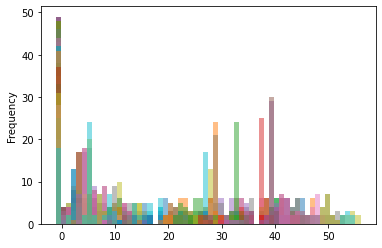

CPU times: user 54.2 s, sys: 33.6 ms, total: 54.3 s
Wall time: 54.6 s


In [32]:
%%time
ax = df.plot.hist(bins=60, alpha=0.5, legend=False)
ax.plot()
plt.show()

In [33]:
%%time
#a = df.hist(bins=60, alpha=1, legend=False, figsize=(60,n*4), layout=(n,11))

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 18.1 µs


### Clustering evaluation


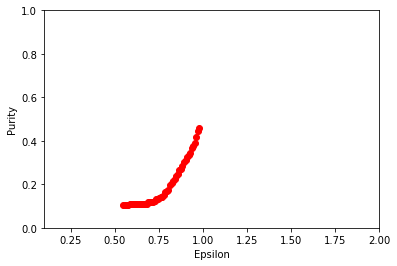

Max purity score is P=0.459, for epsilon=0.9812. 


In [34]:
if test_method:
    sc = get_purity_for_n_results_dbscan(class_vector, results, len(results))
else:
    sc = get_purity_for_n_results_tidbscan(class_vector, results, len(results))

epsilons = get_epsilon_array(epsilon_start, epsilon_end, n)


plt.plot(epsilons, sc, 'ro')
plt.axis([0.1, 2, 0, 1])
plt.xlabel("Epsilon")
plt.ylabel("Purity")
plt.show()

max_purity=max(sc)
eps_for_max_purity=epsilons[sc.index(max_purity)]
print("Max purity score is P={}, for epsilon={}. ".format(round(max_purity,3), eps_for_max_purity))